In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = load_iris()

X = df.data
y = df.target

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [9]:
y_train.shape, y_test.shape

((112,), (38,))

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = model.predict(X_test)

In [38]:
print(f"Train Accuracy: {model.score(X_train, y_train)}")
print(f"Val Accuracy: {accuracy_score(y_test, y_pred)}")

Train Accuracy: 1.0
Val Accuracy: 1.0


### Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [2,3,4]
}

In [41]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [42]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [43]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [44]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [45]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [46]:
model2 = DecisionTreeClassifier(**grid_search.best_params_)

In [48]:
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(f"Train Accuracy: {model2.score(X_train, y_train)}")
print(f"Val Accuracy: {accuracy_score(y_test, y_pred)}")

Train Accuracy: 0.9642857142857143
Val Accuracy: 1.0


### Plot Tree

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree

### Overfitted Tree

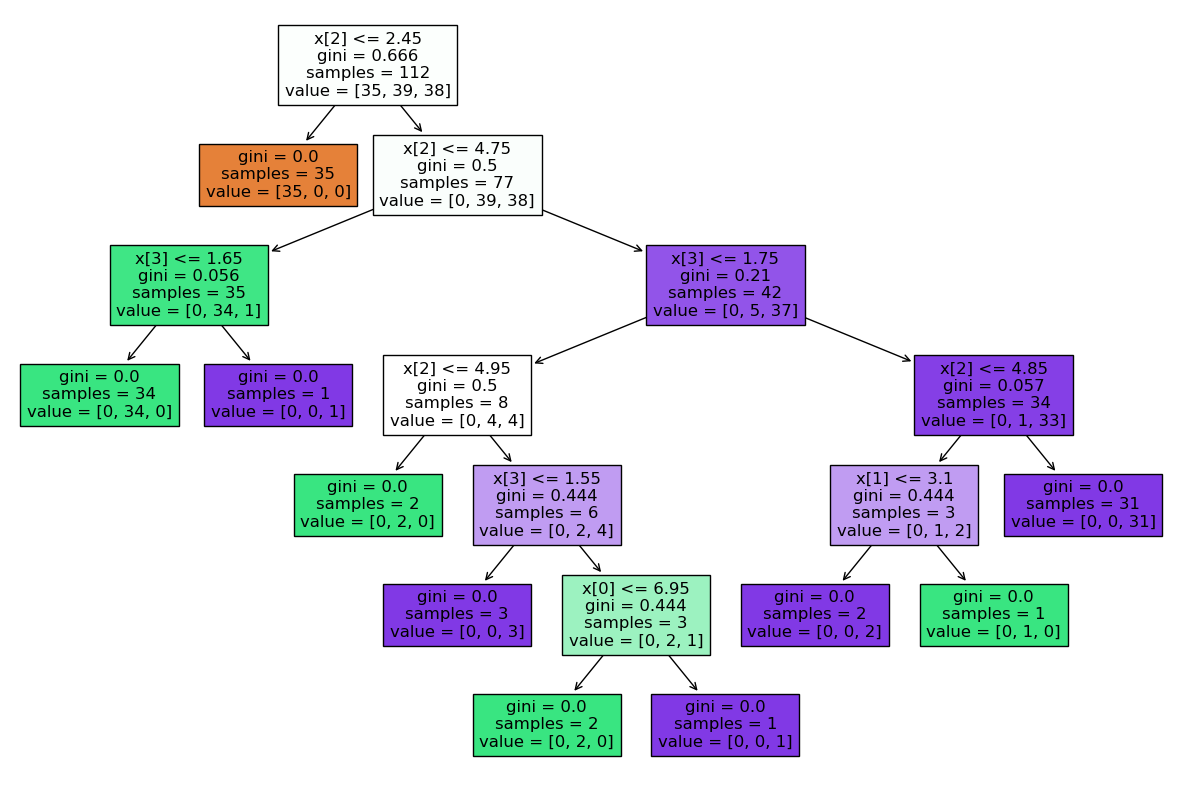

In [51]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)
plt.show()

### Prune Tree

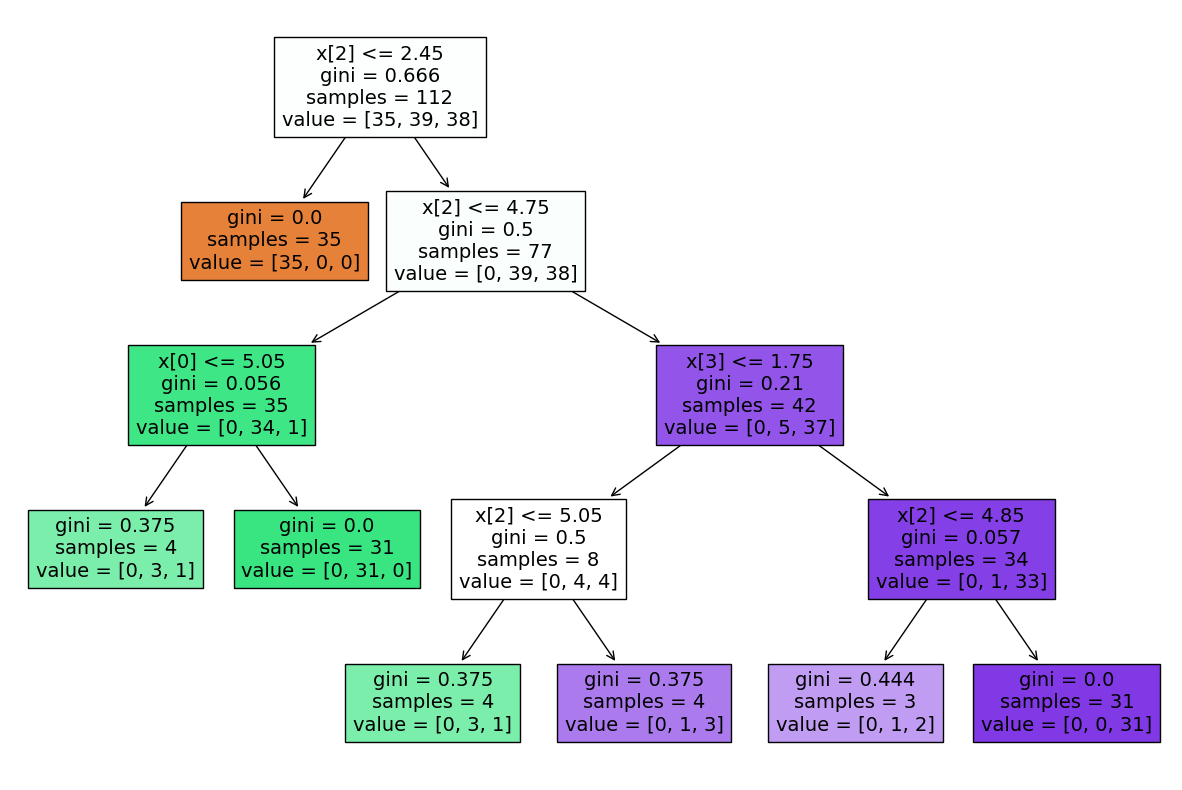

In [52]:
plt.figure(figsize=(15,10))
tree.plot_tree(model2, filled=True)
plt.show()